In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
df = pd.read_csv('C:\\Users\\LEGION\\Documents\\GitHub\\Git_testing\\DS_project02-0\\datasets\\bank_data_train_d02.csv')
df = df.drop('CLNT_JOB_POSITION', axis=1).set_index('ID')

In [31]:
df1 = df.select_dtypes(include=['int64', 'float64']).drop('TARGET', axis=1)
df2 = df.select_dtypes(include=['object'])

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
list_df = df1.copy()
list_df[:] = scaler.fit_transform(df1)
#list_df

In [65]:
df2 = pd.get_dummies(df2)
#df2

In [67]:
data = df2.merge(list_df, left_on='ID', right_on='ID').merge(df.TARGET, left_on='ID', right_on='ID')
#data

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(data.drop('TARGET', axis=1), data.TARGET, test_size=0.2, random_state=21)
#X_train

In [69]:
#X_test

In [77]:
clf = LogisticRegression(solver='liblinear', fit_intercept=False, penalty='l1', random_state=21)
clf.fit(X_train, y_train)
clf.score(X_test, y_test) * 100

91.97331005940482

In [78]:
sum(y_test == 0) / y_test.size * 100

91.96064078380584

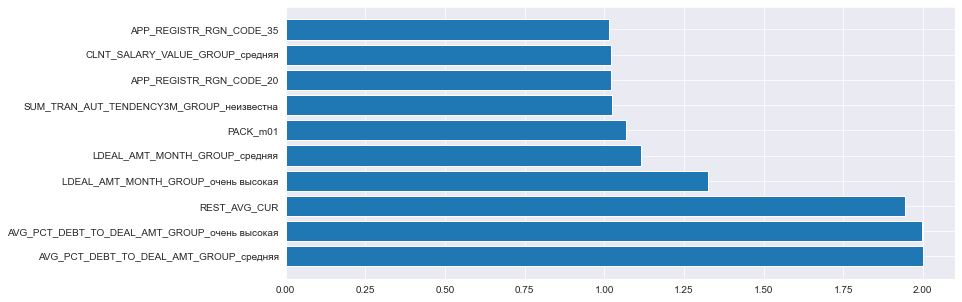

In [63]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize=(12,5))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
f_importances(abs(clf.coef_[0]), X_train.columns, top=10)